In [7]:
import cv2
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,load_model
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import tensorflow as tf
from matplotlib import pyplot as plt

In [8]:

data_path=r'C:\Users\nicol\OneDrive\Desktop\Proiect licenta algoritm\data_set'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'Doubtful': 0, 'Healthy': 1, 'Minimal': 2, 'Moderate': 3, 'Severe': 4}
['Doubtful', 'Healthy', 'Minimal', 'Moderate', 'Severe']
[0, 1, 2, 3, 4]


In [9]:
img_size=224
data=[]
label=[]
for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
            resized=cv2.resize(gray,(img_size,img_size))
            #setam dimenisunea imaginii by default pe 224x224
            data.append(resized)
            label.append(label_dict[category])
            #adaugarea imaginii si a etichetei aferente la lista
        except Exception as e:
            print('Exception:',e)
            #daca apar exceptii/erori se va trece mai departe la urmatoarea imagine


In [10]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
label=np.array(label)

new_label = to_categorical(label)

In [11]:
model_bun=Sequential()
model_bun.add(Conv2D(128,(3,3),input_shape=data.shape[1:]))
model_bun.add(Activation('relu'))
model_bun.add(MaxPooling2D(pool_size=(2,2)))
#primul strat de convolutie cu inputul
model_bun.add(Conv2D(64,(3,3)))
model_bun.add(Activation('relu'))
model_bun.add(MaxPooling2D(pool_size=(2,2)))
#al doilea strat de convolutie 
model_bun.add(Conv2D(32,(3,3)))
model_bun.add(Activation('relu'))
model_bun.add(MaxPooling2D(pool_size=(2,2)))
#al treilea strat de convolutie 
model_bun.add(Flatten())
#strat de Flatten pt a stoca outputul de la cele 3 straturi
model_bun.add(Dropout(0.3))
model_bun.add(Dense(128,activation='relu'))
#strat dens de 128 de neuroni
model_bun.add(Dropout(0.3))
model_bun.add(Dense(64,activation='relu'))
##strat dens de 64 de neuroni
model_bun.add(Dense(5,activation='softmax'))
#stratul final de output cu activare
model_bun.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model_bun.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 128)       │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,769,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,871,141 (10.95 MB)

 Trainable params: 2,871,141 (10.95 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.1)

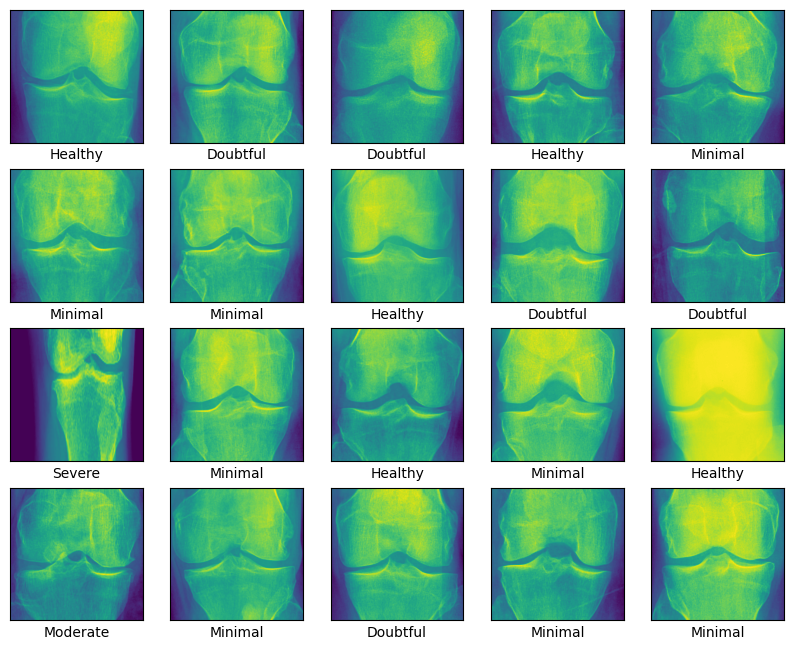

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

In [9]:
logdir='logs'

In [10]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [11]:
from keras.callbacks import ModelCheckpoint

# Definirea unui callback pentru a salva modelul
checkpoint_callback = ModelCheckpoint(filepath='best_model.keras', 
                                      monitor='val_accuracy', 
                                      verbose=1, 
                                      save_best_only=True, 
                                      mode='max')


In [12]:
history=model_bun.fit(x_train,y_train,epochs=100,validation_split=0.2, callbacks=[tensorboard_callback,checkpoint_callback]) 

Epoch 1/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.2674 - loss: 1.5733
Epoch 1: val_accuracy improved from -inf to 0.29451, saving model to best_model.keras
114/114 ━━━━━━━━━━━━━━━━━━━━ 934s 8s/step - accuracy: 0.2674 - loss: 1.5732 - val_accuracy: 0.2945 - val_loss: 1.5435
Epoch 2/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.2861 - loss: 1.5348
Epoch 2: val_accuracy did not improve from 0.29451
114/114 ━━━━━━━━━━━━━━━━━━━━ 897s 8s/step - accuracy: 0.2862 - loss: 1.5348 - val_accuracy: 0.2385 - val_loss: 1.5382
Epoch 3/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.2988 - loss: 1.5306
Epoch 3: val_accuracy did not improve from 0.29451
114/114 ━━━━━━━━━━━━━━━━━━━━ 891s 8s/step - accuracy: 0.2988 - loss: 1.5306 - val_accuracy: 0.2725 - val_loss: 1.5251
Epoch 4/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.2991 - loss: 1.5176
Epoch 4: val_accuracy improved from 0.29451 to 0.30110, saving model to best_model.keras
114/114 ━━━━━━━━━━━━━━━━━

In [13]:
best_model= tf.keras.models.load_model('best_model.keras')



In [14]:
best_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

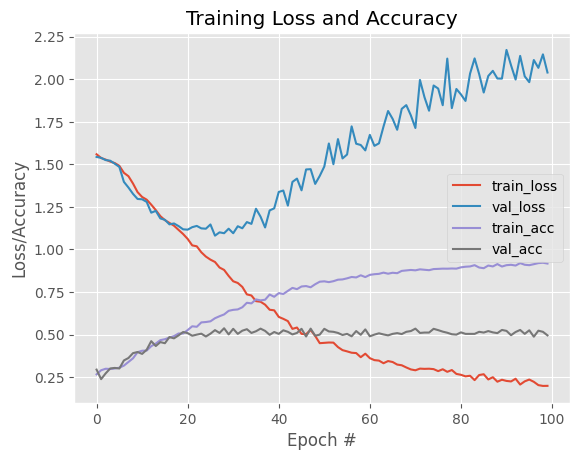

In [29]:
from matplotlib import pyplot as plt
# plot the training loss and accuracy
N = 100 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

In [30]:
vaL_loss, val_accuracy= best_model.evaluate(x_test, y_test, verbose=0)
print("test loss:", vaL_loss,'%')
print("test accuracy:", val_accuracy,"%")

test loss: 2.0612597465515137 %
test accuracy: 0.529644250869751 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
A.I predicts: Moderate
Correct prediction for label 3 is Moderate


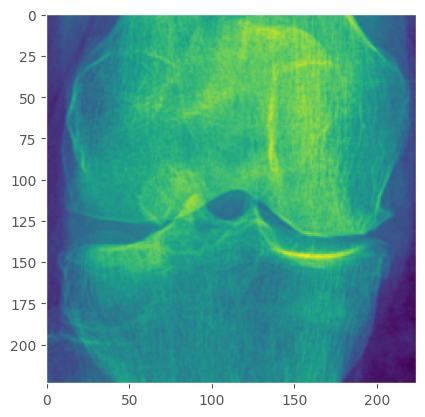

In [33]:
#X = 15
img_size = 224
img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],224,224,1)
predictions_single = best_model.predict(img_single)
print('A.I predicts:',categories[np.argmax(predictions_single)])
print("Correct prediction for label",np.argmax(y_test[X]),'is',categories[np.argmax(y_test[X])])
plt.imshow(np.squeeze(img_single))
plt.grid(False)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
A.I predicts: Healthy


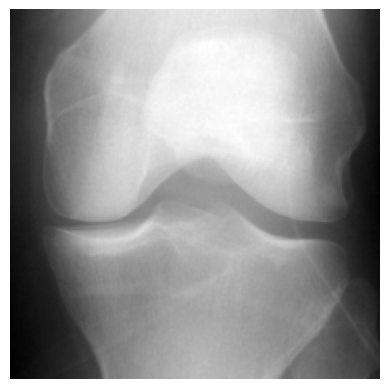

In [22]:
img_size = 224
# Definirea categoriilor sau claselor pentru predicție
categories = ['Doubtful', 'Healthy', 'Minimal', 'Moderate', 'Severe']  
image_path = r'C:\Users\nicol\OneDrive\Desktop\Proiect licenta algoritm\data_set\Healthy\9372977L.png' 

# Încarcă imaginea
img_single = cv2.imread(image_path)

# Redimensionează imaginea la dimensiunea dorită
img_single = cv2.resize(img_single, (img_size, img_size))

# Converteste imaginea la alb-negru (grayscale) dacă modelul așteaptă acest tip de imagine
img_single_gray = cv2.cvtColor(img_single, cv2.COLOR_BGR2GRAY)

# Normalizează imaginea dacă este necesar (de exemplu, la intervalul [0, 1])
img_single_gray_norm = img_single_gray / 255.0

# Adaugă dimensiunea de batch (1, 224, 224, 1) pentru imaginea alb-negru (grayscale)
img_single_batch = np.expand_dims(img_single_gray_norm, axis=(0, -1))

# Realizează predicția
predictions_single = best_model.predict(img_single_batch)

# Afișează rezultatele
print('A.I predicts:', categories[np.argmax(predictions_single)])

# Afișează imaginea
plt.imshow(img_single_gray, cmap='gray')  # Afișează imaginea în grayscale
plt.axis('off')  # Ascunde axele
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 787ms/step


<Figure size 640x480 with 0 Axes>

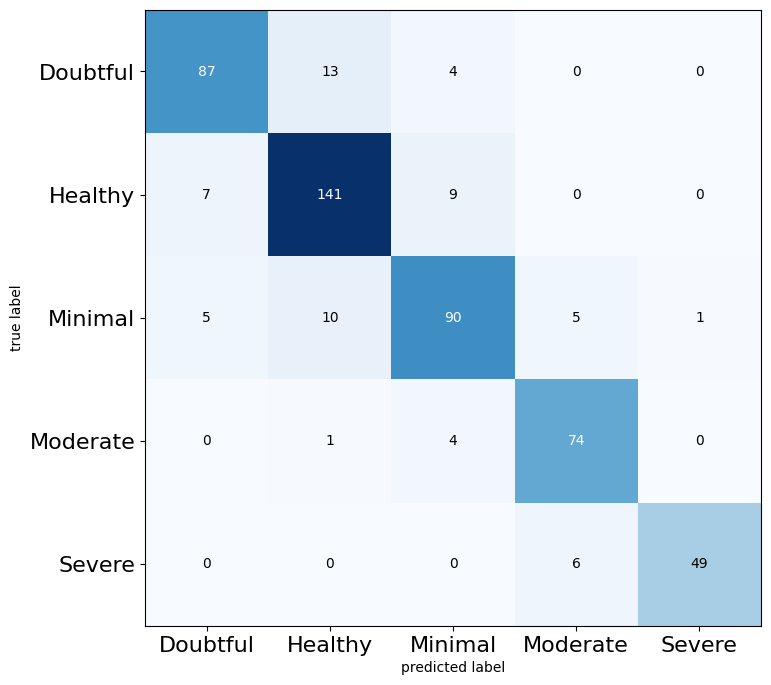

In [15]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
test_labels = np.argmax(y_test, axis=1)
predictions = best_model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)
cm  = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(5), ['Doubtful','Healthy','Minimal','Moderate','Severe'], fontsize=16)
plt.yticks(range(5), ['Doubtful','Healthy','Minimal','Moderate','Severe'], fontsize=16)
plt.show()
